# Notebook from PyData 08/30/2018 Presentation
## Important Info: *gmaps figures won't appear in static notebook, but if you run the notebook yourself you can plot and play with the dynamic gmaps figures*
## Details on gmaps python package can be found here: https://jupyter-gmaps.readthedocs.io/en/stable/ 
## (also requires a gmaps api key) https://developers.google.com/maps/documentation/embed/get-api-key

In [0]:
import json
import numpy as np
import requests
import matplotlib.pyplot as plt
import datetime
import time
import gmaps
import pandas as pd

#  Jupyter Notebooks to Visualize and Analyze MARTA bus data


<img style="float: right;" src="http://28b03yfvd7j3ji3l93ppzub1.wpengine.netdna-cdn.com/wp-content/uploads/2017/06/marta.png" width="550">
<img style="float: left;" src="https://cdn-images-1.medium.com/max/1920/1*wOHyKy6fl3ltcBMNpCvC6Q.png" width="400">


## Required packages:
- Numpy (scientific computing with Python)
- Requests (HTTP library for Python)
- Pandas (data manipulation and analysis)
- gmaps (google maps for jupyter notebook)



## Loading current bus info using *Requests* package (`conda install Requests`)

In [0]:
# Marta provides real-time access to bus and rail information 
bus_url = "http://developer.itsmarta.com/BRDRestService/RestBusRealTimeService/GetAllBus"

# Use requests to get html data
r = requests.get(bus_url)

# And convert data to json format
data_json = r.json()

### What does the data look like?

In [4]:
print(data_json)

[{'ADHERENCE': '-2', 'BLOCKID': '91', 'BLOCK_ABBR': '121-4', 'DIRECTION': 'Northbound', 'LATITUDE': '33.8509155', 'LONGITUDE': '-84.2009591', 'MSGTIME': '9/3/2018 5:47:29 PM', 'ROUTE': '121', 'STOPID': '901618', 'TIMEPOINT': 'Ponce de Leon Ave & Hairston Rd', 'TRIPID': '6277127', 'VEHICLE': '1514'}, {'ADHERENCE': '-17', 'BLOCKID': '569', 'BLOCK_ABBR': '9-3', 'DIRECTION': 'Westbound', 'LATITUDE': '33.7695022', 'LONGITUDE': '-84.3979053', 'MSGTIME': '9/3/2018 5:50:16 PM', 'ROUTE': '9', 'STOPID': '211575', 'TIMEPOINT': 'Boulevard & Delmar Ave', 'TRIPID': '6256914', 'VEHICLE': '1528'}, {'ADHERENCE': '0', 'BLOCKID': '536', 'BLOCK_ABBR': '86-2', 'DIRECTION': 'Westbound', 'LATITUDE': '33.7408898', 'LONGITUDE': '-84.2489707', 'MSGTIME': '9/3/2018 5:51:02 PM', 'ROUTE': '86', 'STOPID': '107262', 'TIMEPOINT': 'Columbia Dr & Snapfinger Rd', 'TRIPID': '6279657', 'VEHICLE': '1515'}, {'ADHERENCE': '-5', 'BLOCKID': '214', 'BLOCK_ABBR': '194-1', 'DIRECTION': 'Northbound', 'LATITUDE': '33.5737531', 'LON

 ## Visualize json data as a table using pandas

In [5]:
print(type(data_json))

pd_json = pd.DataFrame(data_json)

pd_json

<class 'list'>


,ADHERENCE,BLOCKID,BLOCK_ABBR,DIRECTION,LATITUDE,LONGITUDE,MSGTIME,ROUTE,STOPID,TIMEPOINT,TRIPID,VEHICLE
0,-2,91,121-4,Northbound,33.8509155,-84.2009591,9/3/2018 5:47:29 PM,121,901618,Ponce de Leon Ave & Hairston Rd,6277127,1514
1,-17,569,9-3,Westbound,33.7695022,-84.3979053,9/3/2018 5:50:16 PM,9,211575,Boulevard & Delmar Ave,6256914,1528
2,0,536,86-2,Westbound,33.7408898,-84.2489707,9/3/2018 5:51:02 PM,86,107262,Columbia Dr & Snapfinger Rd,6279657,1515
3,-5,214,194-1,Northbound,33.5737531,-84.3499933,9/3/2018 5:51:14 PM,194,212168,Southlake Mall,6287142,1849
4,0,131,141-6,Northbound,34.0842737,-84.2617064,9/3/2018 5:51:53 PM,141,903220,Main St & Windward Pkwy,0,2514
5,-11,491,84-1,Eastbound,33.6777544,-84.4402731,9/3/2018 5:53:16 PM,181,166148,Washington Rd & Stone Rd,6297786,1802
6,0,308,36-2,Eastbound,33.7745671,-84.2980021,9/3/2018 5:53:17 PM,36,212946,Decatur Station,6281959,1412
7,-7,203,191-4,Southbound,33.5241164,-84.3635537,9/3/2018 5:53:52 PM,193,212474,Tara Blvd & Battle Creek Rd,6292246,2360
8,-10,458,81-4,Northbound,33.7356278,-84.4134932,9/3/2018 5:54:14 PM,155,125030,Ridge Ave & Pulliam St,6277433,2314
9,-2,445,8-2,Northbound,33.8600914,-84.3390717,9/3/2018 5:54:23 PM,8,211463,Druid Hills Rd & Briarcliff Rd,6278666,1410


# Grab the first index of the json data

In [6]:
data_json[0]

{'ADHERENCE': '-2',
 'BLOCKID': '91',
 'BLOCK_ABBR': '121-4',
 'DIRECTION': 'Northbound',
 'LATITUDE': '33.8509155',
 'LONGITUDE': '-84.2009591',
 'MSGTIME': '9/3/2018 5:47:29 PM',
 'ROUTE': '121',
 'STOPID': '901618',
 'TIMEPOINT': 'Ponce de Leon Ave & Hairston Rd',
 'TRIPID': '6277127',
 'VEHICLE': '1514'}

In [7]:
on_time = pd_json.get('ADHERENCE') == '0'
on_time.tolist()

[False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False

## How many buses are there?


In [8]:
len(data_json)

244

## Where are these buses? Using longitute and latitude coordinates!

In [9]:
# Setup numpy arrays
locations = np.zeros([len(data_json),2])
adherences = np.zeros([len(data_json)])
bus_ids = np.zeros([len(data_json)])
directions = []

n = 0
for i in data_json :
    # Get the bus id
    bus_ids[n] = int(i['VEHICLE'])
    # First grab locations for each marta bus
    locations[n,:] = [float(i['LATITUDE']),float(i['LONGITUDE'])]
    # Then grab adherences (# of minutes ahead/behind schedule)
    adherences[n] = -1*int(i['ADHERENCE'])
    # Directions of buses
    directions.append(i['DIRECTION'])
    # increase index by 1
    n = n + 1
    
# Only looking at 
# adherences[adherences<=0] = 1

print('locations of first 10 buses from json file:')
print(locations[0:10])

locations of first 10 buses from json file:
[[ 33.8509155 -84.2009591]
 [ 33.7695022 -84.3979053]
 [ 33.7408898 -84.2489707]
 [ 33.5737531 -84.3499933]
 [ 34.0842737 -84.2617064]
 [ 33.6777544 -84.4402731]
 [ 33.7745671 -84.2980021]
 [ 33.5241164 -84.3635537]
 [ 33.7356278 -84.4134932]
 [ 33.8600914 -84.3390717]]


## Some basic bus stats

In [10]:
# Looking at all buses
print('Average Bus Delay : %d minute(s)' % np.mean(adherences) )
print('Max Bus Delay : %d minute(s)' % np.min(adherences) )
print('Min Bus Delay : +%d minute(s)' % np.max(adherences) )

# Looking at buses travelling in specific direction

direction_inds = []
travel_direction = 'Westbound'
for i, string in enumerate(directions):
    if travel_direction == string:
        direction_inds.append(i)
        
print('Average (%s) Bus Delay : %d minute(s)' % (travel_direction,np.mean(adherences[direction_inds])) )


Average Bus Delay : 1 minute(s)
Max Bus Delay : -5 minute(s)
Min Bus Delay : +17 minute(s)
Average (Westbound) Bus Delay : 1 minute(s)


## Lets examine the locations with a scatter plot

<function matplotlib.pyplot.show>

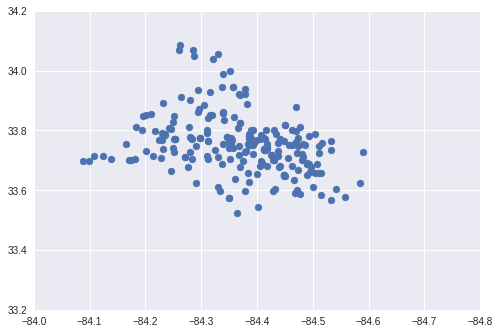

In [11]:
plt.scatter(locations[:,1],locations[:,0])
plt.ylim([33.2,34.2])
plt.xlim([-84,-84.8])
plt.show

<img style="float: center;" src="https://www.technobezz.com/news/wp-content/uploads/2018/03/Google-Maps.jpg" width=400>

## Bus locations with `gmaps` 


In [15]:
import gmaps

gmaps.configure(api_key = API_KEY_GOES_HERE) # Your Google API key

fig = gmaps.figure(center = [np.median(locations[:,0]),np.median(locations[:,1])], zoom_level = 10)
# fig.add_layer(gmaps.transit_layer())
fig

# fig.add_layer(gmaps.heatmap_layer(locations,max_intensity=1,point_radius=5.0))

Figure(layout=FigureLayout(height='420px'))

In [16]:
bus_all = gmaps.symbol_layer(
    locations, 
    fill_color='black', 
    stroke_color='black', 
    scale=2)

fig = gmaps.figure(center = [np.median(locations[:,0]),np.median(locations[:,1])], zoom_level = 10)
fig.add_layer(bus_all)
fig

Figure(layout=FigureLayout(height='420px'))

## Why is my bus so late?

In [17]:
bus_all = gmaps.symbol_layer(
    locations, # [adherences<10 and adherences>=0]
    fill_color='blue',
    stroke_color='blue',
    scale=2)

bus_late = gmaps.symbol_layer(
    locations[adherences>=10],
    fill_color='white',
    stroke_color='red',
    scale=3)

bus_early = gmaps.symbol_layer(
    locations[adherences<0],
    fill_color='white',
    stroke_color='green',
    scale=3)

fig = gmaps.figure(center = [np.median(locations[:,0]),np.median(locations[:,1])], zoom_level = 10)

fig.add_layer(bus_all)
fig.add_layer(bus_late)
fig.add_layer(bus_early)

fig

Figure(layout=FigureLayout(height='420px'))